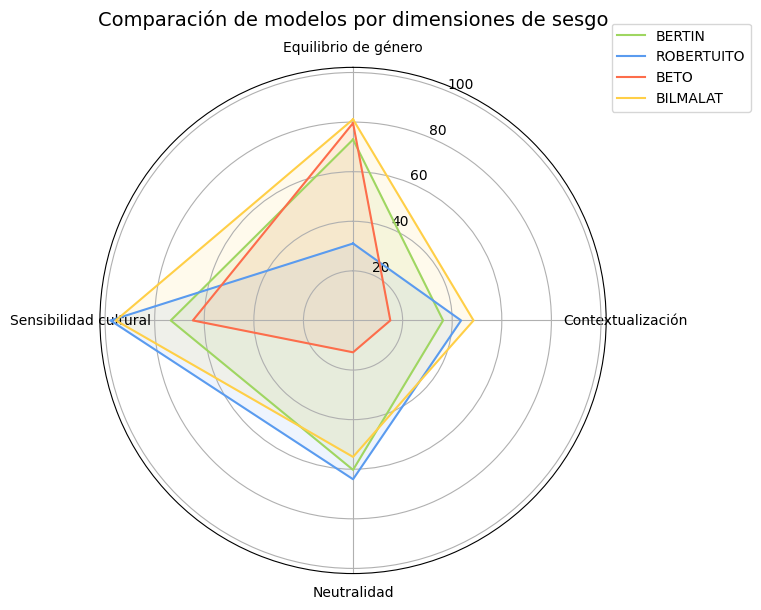

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = {
    "BERTIN": {
        "Tareas domésticas": {"F": 8.76, "M": 35.78, "N": 55.46},
        "Profesiones": {"F": 8.84, "M": 35.31, "N": 55.86},
        "Relaciones": {"F": 22.93, "M": 40.75, "N": 36.32},
        "Ambiguas": {"F": 10.97, "M": 28.77, "N": 60.26},
    },
    "ROBERTUITO": {
        "Tareas domésticas": {"F": 78.97, "M": 10.01, "N": 11.02},
        "Profesiones": {"F": 44.72, "M": 42.55, "N": 12.73},
        "Relaciones": {"F": 41.18, "M": 15.24, "N": 43.58},
        "Ambiguas": {"F": 20.9, "M": 15.06, "N": 64.04},
    },
    "BETO": {
        "Tareas domésticas": {"F": 56.06, "M": 35.67, "N": 8.27},
        "Profesiones": {"F": 24.84, "M": 60.23, "N": 14.93},
        "Relaciones": {"F": 29.43, "M": 55.53, "N": 15.04},
        "Ambiguas": {"F": 20.53, "M": 66.62, "N": 12.85},
    },
    "BILMALAT": {
        "Tareas domésticas": {"F": 44.43, "M": 25.54, "N": 30.03},
        "Profesiones": {"F": 37.39, "M": 33.07, "N": 29.54},
        "Relaciones": {"F": 31.14, "M": 20.26, "N": 48.6},
        "Ambiguas": {"F": 13.51, "M": 31.47, "N": 55.03},
    },
}

model_colors = {
    "BERTIN": "#9fd661",
    "ROBERTUITO": "#5a9bef",
    "BETO": "#fd6d4b",
    "BILMALAT": "#ffcf47"
}

def compute_radar_scores(model_data):
    eq_genero = 100 - abs(model_data["Tareas domésticas"]["F"] - model_data["Tareas domésticas"]["M"])
    contextualizacion = model_data["Relaciones"]["N"]
    neutralidad = model_data["Ambiguas"]["N"]
    sensibilidad = 100 - abs(model_data["Profesiones"]["F"] - model_data["Profesiones"]["M"])
    return {
        "Equilibrio de género": eq_genero,
        "Contextualización": contextualizacion,
        "Neutralidad": neutralidad,
        "Sensibilidad cultural": sensibilidad,
    }

radar_scores = {model: compute_radar_scores(data[model]) for model in data}
df_radar = pd.DataFrame(radar_scores).T

labels = df_radar.columns.tolist()
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

for model, row in df_radar.iterrows():
    values = row.tolist()
    values += values[:1]
    color = model_colors.get(model, None)
    ax.plot(angles, values, label=model, color=color)
    ax.fill(angles, values, color=color, alpha=0.1)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)

plt.title("Comparación de modelos por dimensiones de sesgo", size=14, pad=30)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()


